<a href="https://colab.research.google.com/github/Manishtyy/sentiment/blob/main/Main1_Copy_of_app_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment Analysis of Android and IOS App's Reviews

In [27]:
pip install google-play-scraper

In [28]:
pip install app-store-scraper

In [29]:
# Ask the user to enter the package name and app ID
google_package_name = input("Enter the Android_app package name (e.g., com.digilocker.android /flipboard.app): ")
apple_package_name = input("Enter the IOS_App's package name (e.g., digilocker / flipboard-the-social-magazine):")
app_id = input("Enter the app ID (e.g., 1320618078 / 358801284 ): ")

Enter the Android_app package name (e.g., com.digilocker.android /flipboard.app): com.rfi.sams.android
Enter the IOS_App's package name (e.g., digilocker / flipboard-the-social-magazine):sams-club
Enter the app ID (e.g., 1320618078 / 358801284 ): 382497397


In [30]:
# #scrape Android and IOS App Reviews

# import asyncio
# import threading
# import pandas as pd
# import numpy as np
# import uuid
# from google_play_scraper import Sort, reviews_all
# from app_store_scraper import AppStore
# from google.colab import files

# # Define package names and app ID
# # google_package_name = "your_google_package_name"
# # apple_package_name = "your_apple_package_name"
# # app_id = "your_app_id"

# # Define global variables for DataFrames
# a_df2 = pd.DataFrame()
# g_df2 = pd.DataFrame()

# # Define scraping functions for Google Play and Apple App Store
# async def scrape_google_reviews():
#     global g_df2  # Use the global variable
#     g_reviews = reviews_all(google_package_name, sleep_milliseconds=0, lang='en', country='us', sort=Sort.NEWEST)
#     g_reviews = g_reviews[:1000]
#     print("Google Reviews Sample:", g_reviews[:5])

#     g_df = pd.DataFrame(np.array(g_reviews), columns=['review'])
#     g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

#     # Add checks for columns before dropping them
#     columns_to_drop = ['at', 'repliedAt', 'replyContent', 'thumbsUpCount', 'userImage', 'reviewCreatedVersion', 'userName']
#     for col in columns_to_drop:
#         if col in g_df2.columns:
#             g_df2.drop(columns=col, inplace=True)

#     g_df2.rename(columns={'score': 'rating', 'reviewId': 'review_id', 'content': 'review_description'}, inplace=True)
#     g_df2.insert(loc=0, column='source', value='Google Play')
#     g_df2.insert(loc=4, column='review_title', value=None)
#     g_df2['language_code'] = 'en'
#     g_df2['country_code'] = 'us'

# async def scrape_apple_reviews():
#     global a_df2  # Use the global variable
#     a_reviews = AppStore('us', apple_package_name, app_id)
#     await a_reviews.review(limit=1000)
#     print("Apple Reviews Sample:", a_reviews.reviews[:5])

#     a_df = pd.DataFrame(np.array(a_reviews), columns=['review'])
#     a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

#     # Add checks for columns before dropping them
#     columns_to_drop = ['at', 'repliedAt', 'replyContent', 'thumbsUpCount', 'userImage', 'reviewCreatedVersion', 'userName']
#     for col in columns_to_drop:
#         if col in a_df2.columns:
#             a_df2.drop(columns=col, inplace=True)

#     a_df2.insert(loc=0, column='source', value='App Store')
#     a_df2['app_version'] = None
#     a_df2['language_code'] = 'en'
#     a_df2['country_code'] = 'us'
#     a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])

# # Start the scraping in separate event loops
# async def scrape_reviews():
#     await asyncio.gather(
#         scrape_google_reviews(),
#         scrape_apple_reviews()
#     )

# # Process the scraped data
# def process_data():
#     global a_df2, g_df2  # Use the global variables

#     # Process the data as needed

# # Start the scraping in a new thread
# scraping_thread = threading.Thread(target=lambda: asyncio.run(scrape_reviews()))
# scraping_thread.start()
# scraping_thread.join()

# # Process the data
# process_data()

# # Download Review File
# output_file = 'App_reviews.csv'
# a_df2.to_csv('App_reviews.csv', index=False)
# g_df2.to_csv('App_reviews.csv', mode='a', header=True, index=False)
# files.download(output_file)




In [39]:
import asyncio
import threading
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews_all
from app_store_scraper import AppStore
from google.colab import files
import uuid

# Initialize global DataFrames
a_df2 = pd.DataFrame()
g_df2 = pd.DataFrame()

# Define scraping functions for Google Play and Apple App Store
async def scrape_google_reviews():
    global g_df2  # Use the global variable
    g_reviews = reviews_all(google_package_name, sleep_milliseconds=0, lang='en', country='us', sort=Sort.NEWEST)
    g_reviews = g_reviews[:5000]
    print("Google Reviews Sample:", g_reviews[:5])

    g_df = pd.DataFrame(np.array(g_reviews), columns=['review'])
    g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))

    # Add checks for columns before dropping them
    columns_to_drop = ['repliedAt', 'replyContent', 'thumbsUpCount', 'userImage', 'reviewCreatedVersion', 'userName']
    for col in columns_to_drop:
        if col in g_df2.columns:
            g_df2.drop(columns=col, inplace=True)

    g_df2.rename(columns={'score': 'rating', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date'}, inplace=True)
    g_df2.insert(loc=0, column='source', value='Google Play')
    g_df2.insert(loc=4, column='review_title', value=None)
    g_df2['language_code'] = 'en'
    g_df2['country_code'] = 'us'

async def scrape_apple_reviews():
    global a_df2  # Use the global variable
    a_reviews = AppStore('us', app_id)
    await a_reviews.review(limit=1000)
    print("Apple Reviews Sample:", a_reviews.reviews[:5])

    a_df = pd.DataFrame(np.array(a_reviews.reviews), columns=['review'])
    a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))

    # Add checks for columns before dropping them
    columns_to_drop = ['isEdited', 'developerResponse', 'date', 'userName']
    for col in columns_to_drop:
        if col in a_df2.columns:
            a_df2.drop(columns=col, inplace=True)

    a_df2.insert(loc=0, column='source', value='App Store')
    a_df2['app_version'] = None
    a_df2['language_code'] = 'en'
    a_df2['country_code'] = 'us'
    a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])

    return a_df2, g_df2  # Return DataFrames

# Start the scraping in separate event loops
async def scrape_reviews():
    await asyncio.gather(
        scrape_google_reviews(),
        scrape_apple_reviews()
    )

# Process the scraped data
def process_data():
    global a_df2, g_df2  # Use the global variables
    # Process the data as needed

# Start the scraping in a new thread
scraping_thread = threading.Thread(target=asyncio.run, args=(scrape_reviews(),))
scraping_thread.start()
scraping_thread.join()

# Process the data
process_data()

# Download Review File
output_file = 'App_reviews.csv'
a_df2.to_csv('App_reviews.csv', index=False)
g_df2.to_csv('App_reviews.csv', mode='a', header=True, index=False)
files.download(output_file)


Google Reviews Sample: [{'reviewId': 'b2a76ea0-8ef8-43d0-bc5f-6a12e202a060', 'userName': 'Teguh Sridjajamerta', 'userImage': 'https://play-lh.googleusercontent.com/a-/AD_cMMQSaZNR_tmLKLukC1Q_n68llTnf1gTxNO8iZqRJ7gyje8CU', 'content': 'I like to pay my gas with the app', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '23.07.10', 'at': datetime.datetime(2023, 9, 7, 2, 53, 5), 'replyContent': None, 'repliedAt': None, 'appVersion': '23.07.10'}, {'reviewId': '41d361ee-e86f-4fb1-ba64-ee1dffb42a5b', 'userName': 'kathy murray', 'userImage': 'https://play-lh.googleusercontent.com/a-/AD_cMMRHH0lnHXQ_TWSRZyNkWgiVJUmZA07bH9py57oCA3zY', 'content': 'Greatest gas prices ever... The 5.00 Rotisserie chicken is the best last minute dinner find ever...', 'score': 5, 'thumbsUpCount': 0, 'reviewCreatedVersion': '23.08.13', 'at': datetime.datetime(2023, 9, 7, 2, 15, 23), 'replyContent': None, 'repliedAt': None, 'appVersion': '23.08.13'}, {'reviewId': 'b51a5bbf-0fdc-418f-9523-3985db006280', 'userName

Exception in thread Thread-16 (run):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.10/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/usr/lib/python3.10/asyncio/base_events.py", line 649, in run_until_complete
    return future.result()
  File "<ipython-input-39-318c50ab394a>", line 61, in scrape_reviews
  File "<ipython-input-39-318c50ab394a>", line 39, in scrape_apple_reviews
TypeError: Base.review() got an unexpected keyword argument 'limit'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
#sentiment Analysis

import pandas as pd
from textblob import TextBlob

# Load the CSV data into a DataFrame
df = pd.read_csv('App_reviews.csv')


# Define a function to perform sentiment analysis
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to a specific column (e.g., 'comments') and create a new column for sentiment
df['sentiment'] = df['review_description'].apply(analyze_sentiment)

# Save the updated DataFrame to a new CSV file
df.to_csv('sentiment_analysis_result.csv', index=False)
#files.download('sentiment_analysis_result.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


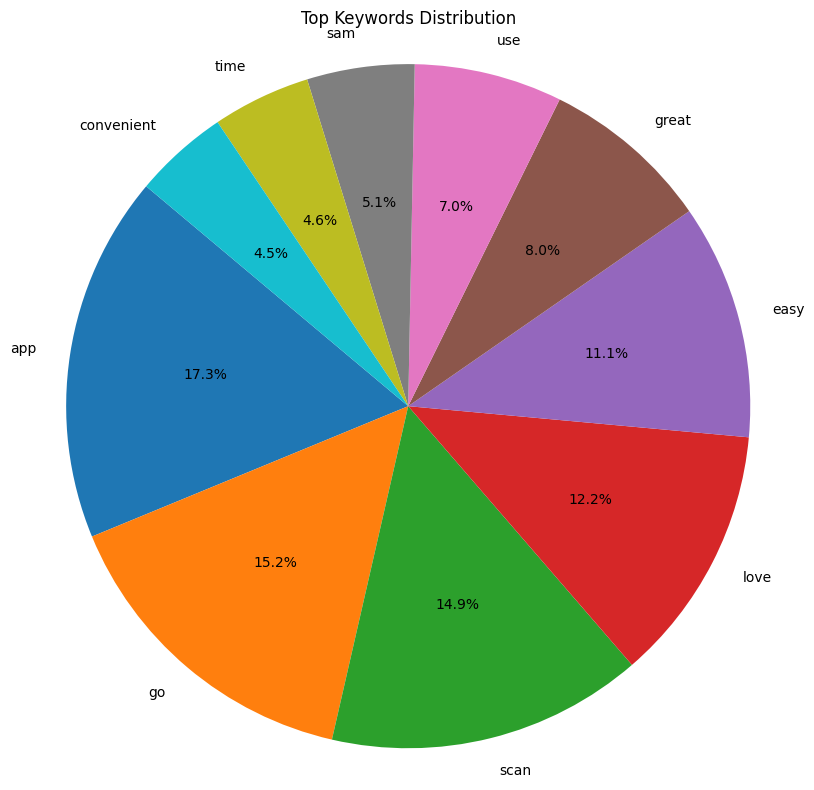

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [62]:
#Keyword Analysis

import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

# Load the CSV data into a DataFrame
df = pd.read_csv('sentiment_analysis_result.csv')

# Preprocessing and tokenization
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(str(text).lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

df['cleaned_reviews'] = df['review_description'].apply(preprocess)

# CountVectorizer Vectorization
count_vectorizer = CountVectorizer(max_features=100)  # You can adjust the number of features (keywords)
count_matrix = count_vectorizer.fit_transform(df['cleaned_reviews'])

# Calculate keyword scores
feature_names = count_vectorizer.get_feature_names_out()
keyword_frequencies = count_matrix.sum(axis=0).tolist()[0]

# Create a dictionary of keywords and their scores
keywords_dict = {feature_names[i]: score for i, score in enumerate(keyword_frequencies)}

# Get the top N keywords
top_keywords = Counter(keywords_dict).most_common(50)  # Get the top 10 keywords

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(frequencies, labels=keywords, autopct='%1.1f%%', startangle=140)
plt.title('Top Keywords Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart as a PNG file
plt.tight_layout()
plt.savefig('top_keywords_pie_chart.png', dpi=300)
plt.show()

# Download the pie chart PNG file
files.download('top_keywords_pie_chart.png')


# Print and save top keywords and their scores to a CSV file
keyword_data = pd.DataFrame(top_keywords, columns=['Keyword', 'frequency'])
keyword_data.to_csv('keyword_analysis_result.csv' , index=False)
#download file to csv
# files.download('sentiment_analysis_result.csv')
# files.download('keyword_analysis_result.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


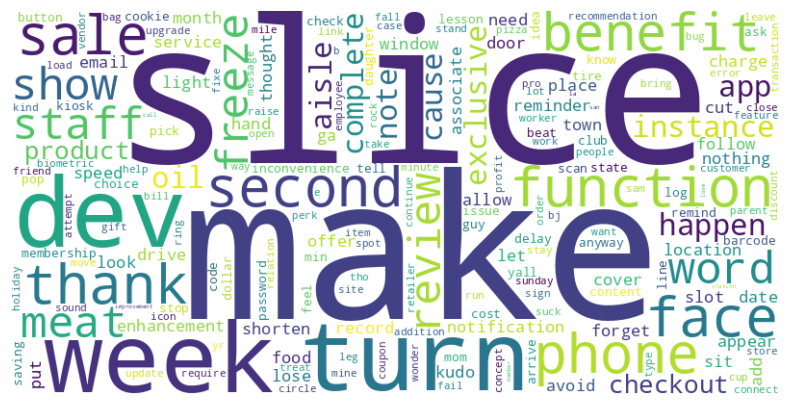

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
#word Cloud generator

import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
df = pd.read_csv('sentiment_analysis_result.csv')

# Preprocessing and tokenization
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(str(text).lower())
    tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

df['cleaned_reviews'] = df['review_description'].apply(preprocess)

# Combine all cleaned reviews into a single text
all_text = ' '.join(df['cleaned_reviews'])

# Tokenize and collect unique words
unique_words = set(nltk.word_tokenize(all_text))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(unique_words))

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the word cloud as an image
wordcloud.to_file('unique_wordcloud.png')


# Optionally, save the word cloud data back to an existing CSV file
df.to_csv('reviews_with_wordcloud.csv', index=False)
files.download('sentiment_analysis_result.csv')
files.download('keyword_analysis_result.csv')
files.download('unique_wordcloud.png')

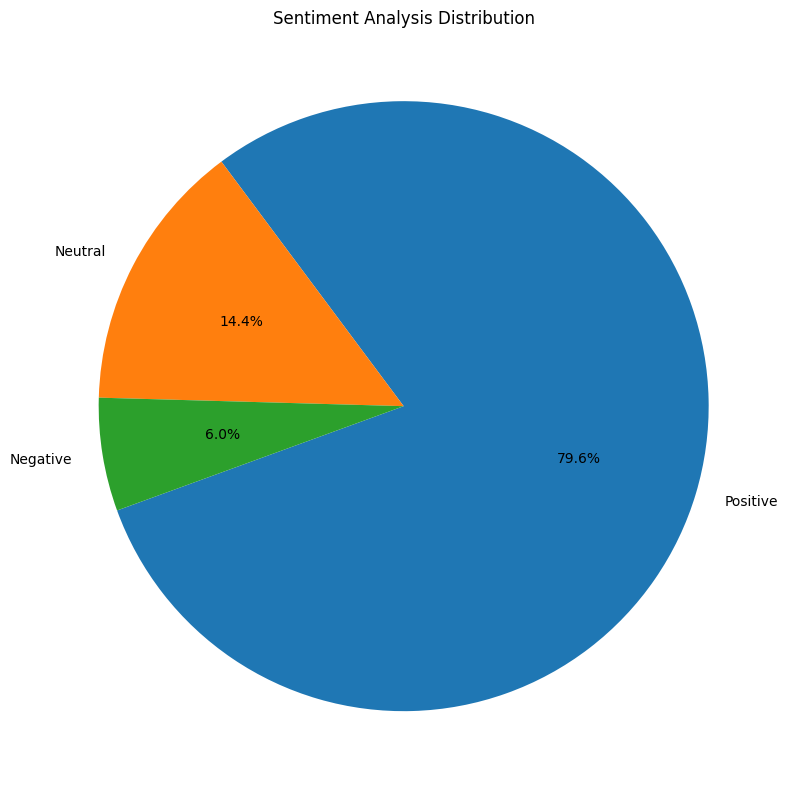

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Load the CSV data into a DataFrame
df = pd.read_csv('sentiment_analysis_result.csv')

# Group by sentiment and count occurrences
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=200)
plt.title('Sentiment Analysis Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the pie chart as a PNG file
plt.tight_layout()
plt.savefig('sentiment_analysis_pie_chart.png', dpi=200)
plt.show()

# Download the pie chart PNG file
files.download('sentiment_analysis_pie_chart.png')
